In [12]:
%matplotlib inline

In [13]:
import pylab as pl
import numpy as np
from astropy.time import Time
import matplotlib

pl.rcParams['figure.figsize'] = (8, 6.0)
pl.rcParams['font.size'] = 22
#pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['axes.linewidth'] = 1.5 #set the value globally

matplotlib.rcParams['font.family'] = 'CMU Sans Serif'


2018-04-03T13:16:00.000 58211.552777777775
2019-01-07T21:11:00.000 58490.88263888889
2018-10-16T20:46:00.000 58407.865277777775
2017-09-29T02:16:00.000 58025.09444444445
2017-10-19T10:26:00.000 58045.43472222222
2018-11-15T01:26:00.000 58437.05972222222
2018-12-08T18:06:00.000 58460.754166666666
[ 58025.09444444  58045.43472222  58211.55277778  58407.86527778
  58437.05972222  58460.75416667  58490.88263889]


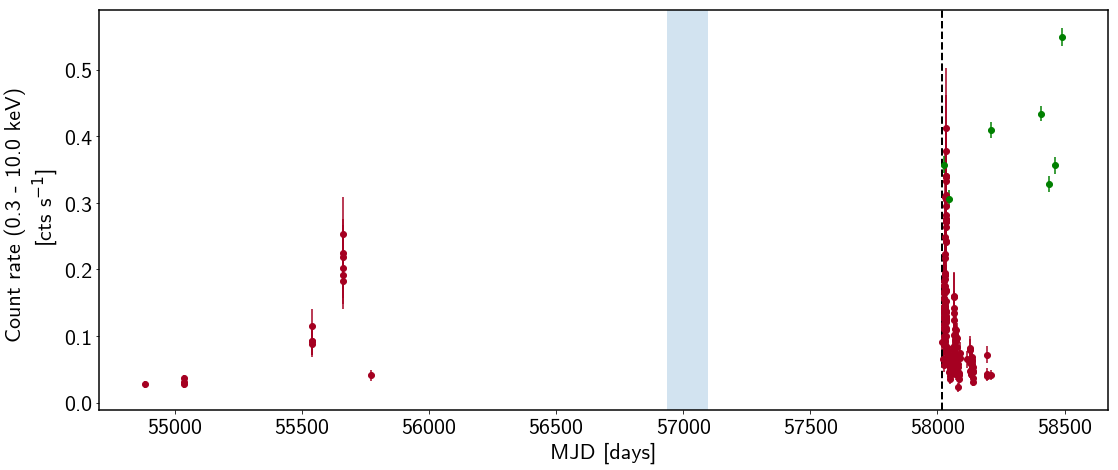

In [66]:
swiftfile = np.genfromtxt("/Users/jmsantander/swift/lightcurve3.txt", skip_header=22, names=True)
fig = pl.figure(figsize=(16,7))
ax = fig.add_subplot(111)
0
sel = (swiftfile["BinCenter"] > 0) & (abs(swiftfile["RateError"]/swiftfile["Rate"]) <  1)
mjdswift = swiftfile["BinCenter"][sel]
rateswift = swiftfile["Rate"][sel]
rateerror = swiftfile["RateError"][sel]
mjderror = swiftfile["BinHW"][sel]


#ax.scatter(mjdswift, rateswift, color="#A50021", s=60)
ax.errorbar(mjdswift, rateswift, yerr=rateerror, \
            xerr=mjderror, linestyle="", fmt='o', \
           color="#A50021")

ax.set_xlabel("MJD [days]")
ax.set_ylabel("Count rate (0.3 - 10.0 keV) \n [cts s$^{-1}$]")
ax.axvspan( 56937.81, 57096.21, alpha=0.2)
ax.axvline(58018.87118056, color='black', linewidth=2, linestyle='--')


nustarfile = np.genfromtxt("/Users/jmsantander/proposals/nustar/nustar_obs.dat")

for nuobs in nustarfile:

    dateline = str(int(nuobs[2])) + '-' + str(int(nuobs[0])).zfill(2) + '-' + str(int(nuobs[1])).zfill(2)
    timeline = str(int(nuobs[3])).zfill(2) + ":" + str(int(nuobs[4])).zfill(2) + ":" + str(int(nuobs[5])).zfill(2)
    ct = Time(dateline+"T"+timeline, format='isot', scale='utc')
    #ax.axvline( ct.mjd, color='green')
    print(ct.isot, ct.mjd)
    
    
    #2012-06-30T23:59:60.000
    
# NuSTAR window
#2019-04-27/08:00 through 2019-07-19/20:00

#times = ['2019-04-27T08:00:00', '2019-07-19T08:00:00']
#t = Time(times, format='isot', scale='utc')

#ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2)


#times = ['2019-04-01T00:00:00', '2020-03-31T00:00:00']
#ct = Time(times, format='isot', scale='utc')

#ax.axvline(ct[0].mjd, color='red', linewidth=2, linestyle='--')
#ax.axvline(ct[1].mjd, color='red', linewidth=2, linestyle='--')

nurates = np.genfromtxt("/Users/jmsantander/proposals/nustar/nustar_lc.dat", names=True)

ctrate = (nurates['RateA']/nurates['dRateA']**2 + nurates['RateB']/nurates['dRateB']**2)/(1./nurates['dRateA']**2 + 1./nurates['dRateB']**2)
dctrate = np.sqrt(nurates['dRateA']**2 + nurates['dRateB']**2)/2.


ax.errorbar(nurates['MJD'], ctrate*10, yerr=dctrate*10, \
           fmt='o', \
           color="green")

print(nurates['MJD'])


fig.tight_layout()

pl.savefig("/Users/jmsantander/proposals/nustar/swift_lc.pdf")



#ax.grid()

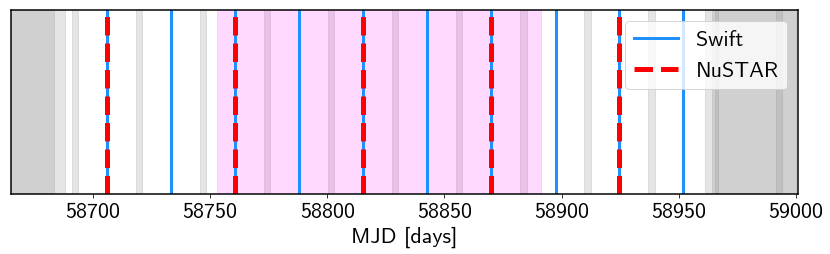

In [109]:
swiftfile = np.genfromtxt("/Users/jmsantander/swift/lightcurve3.txt", skip_header=22, names=True)
fig = pl.figure(figsize=(12, 4))
ax = fig.add_subplot(111)

# NuSTAR avoidance
times = ['2019-04-27T08:00:00', '2019-07-19T08:00:00']
t = Time(times, format='isot', scale='utc')
ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='gray')


times = ['2020-04-26T14:00:00', '2020-05-31T00:00:00']
t = Time(times, format='isot', scale='utc')
ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='gray')

#times = ['2019-04-27T08:00:00', '2019-07-19T08:00:00']
#t = Time(times, format='isot', scale='utc')
#ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='gray')

# Swift avoidance
times = ['2019-04-23T00:00:00', '2019-07-24T00:00:00']
t = Time(times, format='isot', scale='utc')
ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='gray')

times = ['2020-04-22T01:00:00', '2020-07-01T00:00:00']
t = Time(times, format='isot', scale='utc')
ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='gray')

fig.tight_layout()

avoidswift = np.genfromtxt("/Users/jmsantander/swift/avoid_swift_cycle.dat")

starts = []
ends = []

for a in avoidswift:  
    start = str(int(a[0])) + '-' + str(int(a[1])).zfill(2) + '-' + str(int(a[2])).zfill(2) + "T" + str(int(a[3])).zfill(2) + ":00:00"
    end = str(int(a[4])) + '-' + str(int(a[5])).zfill(2) + '-' + str(int(a[6])).zfill(2) + "T" + str(int(a[7])).zfill(2) + ":00:00"

    ct = Time([start,end], format='isot', scale='utc')
    ax.axvspan( ct[0].mjd, ct[1].mjd, alpha=0.2, color='gray')
    
    starts.append(ct[0])
    ends.append(ct[1])
    

    #mid = (ct[0].mjd + ct[1].mjd)/2
    #ax.axvline(mid,color='red')

    
for i in range(len(ends)-2):
    if i == 0:
        continue
    mid = (ends[i].mjd + starts[i+1].mjd) / 2
    
    if i == 1:
        ax.axvline(mid,color='dodgerblue', label='Swift', linewidth=3)
       
    ax.axvline(mid,color='dodgerblue', linewidth=3)
https://heasarc.gsfc.nasa.gov/docs/nustar/nustar_prop.html#visibility
ax.axvline(58590,color='dodgerblue', linewidth=3)
ax.axvline(58590,color='red', linewidth=5, linestyle='--', label='NuSTAR')


for i in range(len(ends)-2):
    mid = (ends[i].mjd + starts[i+1].mjd) / 2


    if i%2 == 1:
        ax.axvline(mid,color='red', linewidth=5, linestyle='--')
        
ax.set_xlabel('MJD [days]')    

#################
# VERITAS avoidance
#times = ['2019-10-05T00:00:00', '2019-12-31T00:00:00']
#t = Time(times, format='isot', scale='utc')
#ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.2, color='magenta')

# Swift avoidance
#times = ['2019-12-31T00:00:00', '2020-02-12T00:00:00']
#t = Time(times, format='isot', scale='utc')
#ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.1, color='magenta')

times = ['2019-09-27T00:00:00', '2020-02-12T00:00:00']
t = Time(times, format='isot', scale='utc')
ax.axvspan( t[0].mjd, t[1].mjd, alpha=0.15, color='magenta')

###############
ax.legend()
ax.get_yaxis().set_visible(False)

# Start end cycle
times = ['2019-07-01T00:00:00', '2020-06-01T00:00:00']
ct = Time(times, format='isot', scale='utc')
ax.set_xlim(ct[0].mjd, ct[1].mjd)

fig.tight_layout()
pl.savefig("/Users/jmsantander/proposals/nustar/obsstrategy.pdf")
#ax.grid()

In [68]:
def getMJD(met):
    return (met/86400.) + 51910.0 + 7.428703703703703E-4

fermi_all = np.genfromtxt("/Users/jmsantander/fermi/txs0506/txs0506_results.dat", comments='#')
swift_all = np.genfromtxt("/Users/jmsantander/fermi/txs0506/lightcurve.txt", skip_header=22, names=True)

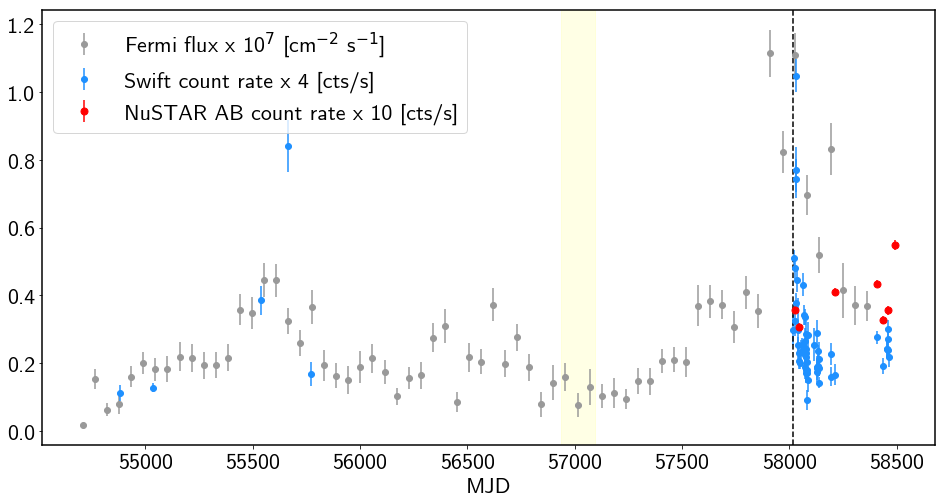

In [110]:
fig = pl.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.errorbar(getMJD(fermi_all[:,0]), fermi_all[:,2]*1e7, fermi_all[:,3]*1e7,linestyle='',marker='o', label='Fermi flux x 10$^7$ [cm$^{-2}$ s$^{-1}$]', color='#999999')
ax.errorbar(swift_all['BinCenter'], swift_all['Rate']*4, swift_all['RateError']*4,linestyle='',marker='o', label='Swift count rate x 4 [cts/s]', color='dodgerblue')

nurates = np.genfromtxt("/Users/jmsantander/proposals/nustar/nustar_lc.dat", names=True)

ctrate = (nurates['RateA']/nurates['dRateA']**2 + nurates['RateB']/nurates['dRateB']**2)/(1./nurates['dRateA']**2 + 1./nurates['dRateB']**2)
dctrate = np.sqrt(nurates['dRateA']**2 + nurates['dRateB']**2)/2.


ax.errorbar(nurates['MJD'], ctrate*10, yerr=dctrate*10, \
           fmt='o', \
           color="red", label='NuSTAR AB count rate x 10 [cts/s]', ms=7)

ax.legend()



ax.set_xlabel("MJD")
ax.axvspan(56937, 57096, color='yellow', alpha=0.1)
ax.axvline(58018.87118056, color='black', linestyle='--')

pl.savefig("/Users/jmsantander/proposals/nustar/txs_data.pdf")
